# Quick recap from last lecture:

#### **1. What Are Eigenvectors and Eigenvalues?**

**The Basics**: Imagine a matrix $A$ as a machine that transforms vectors—stretching, shrinking, or rotating them. Eigenvectors and eigenvalues describe the special cases of this transformation.

- **Eigenvectors**: These are vectors that, when transformed by $A$, don't change direction—they only get scaled. Mathematically, for a matrix $A$ and vector $\mathbf{v}$, we have $A\mathbf{v} = \lambda \mathbf{v}$. Here, $\mathbf{v}$ is the eigenvector.
- **Eigenvalues**: The scalar $\lambda$ is the eigenvalue. It tells us how much the eigenvector is stretched ($\lambda > 1$), shrunk ($0 < \lambda < 1$), or flipped ($\lambda < 0$).

**First Principles**: Think of a matrix as encoding a rule for moving points in space. Eigenvectors are the "stable" directions where the rule simplifies to just scaling, and eigenvalues measure that scaling.

**Why They Matter**: They reveal the underlying structure of transformations, which is key for understanding data patterns (in PCA) and image features (in Harris corner detection).

---

#### **2. Principal Component Analysis (PCA): Finding Data's Natural Directions**

**The Basics**: PCA is a method to simplify high-dimensional data by finding the directions where it varies the most, using eigenvectors and eigenvalues.

> **Eigenvalues** tell us the magnitude of variation in certain directions.

> **Eigenvectors** tell us the directions of that variation.


**First Principles**: Variance measures how spread out data is. The covariance matrix captures this spread across all directions. Its eigenvectors point where the spread is biggest, and PCA uses these to reframe the data simply and efficiently.

**Question**: *How is PCA different from just applying eigenvectors?*  
**Answer**: PCA isn't just eigenvectors—it's a process. It centers the data, builds the covariance matrix, finds its eigenvectors and eigenvalues, and projects the data onto the most significant directions. Eigenvectors alone don't consider the data's structure or variance; PCA ties them to the data's natural patterns.

---

#### **3. Harris Corner Detection: Spotting Corners in Images**

**The Basics**: Harris corner detection finds points in an image where intensity changes a lot in multiple directions (corners), using a matrix similar to PCA's covariance matrix.

**How It Works**:
1. **Gradients**: Compute intensity changes in the x-direction ($I_x$) and y-direction ($I_y$) using filters (e.g., Sobel).
2. **Structure Tensor**: For each pixel, form a 2×2 matrix over a small window:  
   $$M = \sum_{\text{window}} \begin{bmatrix} I_x^2 & I_x I_y \\ I_x I_y & I_y^2 \end{bmatrix}$$
   This summarizes how gradients vary locally.
3. **Eigenvalues**: Find the eigenvalues $\lambda_1$ and $\lambda_2$ (assume $\lambda_1 \geq \lambda_2$):
   - **Flat**: Both small.
   - **Edge**: One large, one small.
   - **Corner**: Both large.
4. **Decision**: Use the Harris response $R = \lambda_1 \lambda_2 - k (\lambda_1 + \lambda_2)^2$. Large positive $R$ means a corner.

**First Principles**: Gradients show how intensity shifts. The structure tensor is like a covariance matrix for these shifts. Its eigenvalues measure the strength of change in the principal directions (given by eigenvectors), letting us classify corners where change is strong both ways.

**Question**: *How is Harris corner detection similar to PCA?*  
**Answer**: Both analyze variation using eigenvectors and eigenvalues. PCA looks at global data variance via the covariance matrix; Harris looks at local gradient variance via the structure tensor. The math is parallel, but the context (data vs. images) differs.

---

#### **4. Orthogonality and Rotational Invariance**

**The Basics**: Eigenvectors in PCA and Harris are orthogonal, meaning their directions are perpendicular. This simplifies analysis and ensures independence.

**Why Orthogonal?**:
- **PCA**: The covariance matrix is symmetric, so its eigenvectors are orthogonal. This keeps principal components independent, avoiding overlap in variance.
- **Harris**: The structure tensor is symmetric too, so its eigenvectors (directions of max/min gradient change) are perpendicular—e.g., along and across an edge.

**Question**: *How do we know the change is orthogonal in Harris corner detection?*  
**Answer**: Because $M$ is symmetric, its eigenvectors are always orthogonal. This reflects the physics of gradients: the strongest and weakest changes naturally occur at right angles.

**Question**: *Does Harris corner detection work for rotated edges?*  
**Answer**: Yes. Eigenvalues depend on the magnitude of gradient variation, not its orientation—they're rotationally invariant. The eigenvectors rotate with the edge, but the corner/edge/flat classification (based on $\lambda_1$ and $\lambda_2$) stays consistent.

---

#### **5. Tying It All Together**

- **Eigenvectors and Eigenvalues**: Core tools to find principal directions and their strengths.
- **PCA**: Uses them to simplify data by focusing on variance.
- **Harris**: Uses them to detect image corners by analyzing gradient changes.
- **Orthogonality**: Keeps directions separate and clear.
- **Rotational Invariance**: Ensures robustness to orientation.

## 1. What Is Motion Detection?

Motion detection identifies movement between frames in video. It’s key for:

- Surveillance  
- Autonomous driving  
- Robotics navigation  
- Sports analytics  
- Gesture interaction  
- Activity recognition  

Motion gives context to changing scenes, enabling computers to react intelligently to the world.



## 2. Theory: How Motion Is Detected
### Image & Video Basics
- **Pixels**: Smallest units of an image.
- **Frame**: A single image in a video.
- **Video**: Sequence of frames over time.
- **Image Gradient**: Measures change in pixel intensity—essential for detecting motion.

### Key Concepts
#### 1. Frame Differencing
$$\text{Difference} = | \text{Frame}_{t} - \text{Frame}_{t-1} |$$

Apply a threshold to highlight changes (motion):  

```python
if diff > threshold: motion = 1  # white
else: motion = 0  # black
```

#### 2. Background Subtraction
Subtract a learned static background from the current frame:

```python
foreground = current_frame - background_model
```

#### 3. Optical Flow
Estimates motion vectors of pixels:
$$I(x, y, t) \approx I(x + dx, y + dy, t + dt)$$

Derives velocity $(u, v)$ per pixel using:
$$\frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v + \frac{\partial I}{\partial t} = 0$$




The primary objective of motion detection in this context is to **identify regions in a video where movement occurs**—i.e., to detect changes that indicate something in the scene is not static. This is a foundational step in computer vision, often used to:
1. **Flag Motion Events**: Detect that *something* is moving (e.g., for surveillance or triggering an alert).
2. **Locate Moving Regions**: Highlight areas of interest for further analysis (e.g., where to look for objects).
3. **Analyze Motion Patterns**: Understand how things move (e.g., speed, direction) for applications like robotics or automotive safety.

They detect **motion**, not **what** is moving.



### Understanding the Three Methods


#### 1. Frame Differencing
- **What It Does**: Subtracts one frame from the previous one to highlight pixel-level changes.  
  - Formula: `Difference = |Frame_t - Frame_{t-1}|`
  - Output: A binary or grayscale image where bright areas indicate motion.
- **Why It’s Useful**: It’s a simple, fast way to detect *any* change between frames. In a static camera setup (e.g., a security camera), most of the scene should remain constant, so differences likely indicate motion (e.g., a car or person entering the frame).
- **Limitation**: It doesn’t distinguish what’s moving or why (e.g., lighting changes, noise, or camera shake can trigger false positives). It also lacks direction or context.



#### 2. Background Subtraction
- **What It Does**: Models the static “background” of a scene and subtracts it from the current frame to isolate the “foreground” (moving parts).  
  - Formula: `Foreground = Current Frame - Background Model`
  - Output: A mask where foreground (moving areas) is highlighted.
- **Why It’s Useful**: Unlike frame differencing, it adapts to slow changes (e.g., lighting shifts) by updating the background model over time. It’s great for isolating moving regions in a mostly static scene (e.g., a road with cars passing by). It’s not about frames changing generally; it’s about separating persistent background from transient foreground. In `road_car_view.mp4`, for example, the road might be static while cars move, making this method effective.
- **Limitation**: It assumes a stable background, so it struggles with camera motion or dynamic backgrounds (e.g., waving trees). It also doesn’t identify objects—just moving regions.



#### 3. Optical Flow
- **What It Does**: Estimates the motion of pixels (or features) between frames as a vector field.  
  - Sparse (Lucas-Kanade): Tracks specific points (e.g., corners).  
  - Dense (Farneback): Computes motion for every pixel.  
  - Formula: `∂I/∂x * u + ∂I/∂y * v + ∂I/∂t = 0` (solving for velocities `u`, `v`).
- **Why It’s Useful**: It provides direction and magnitude of motion, not just presence. This is critical for understanding *how* things move (e.g., a car moving left vs. right), making it valuable for robotics or gesture recognition. It still detects motion, not objects, but it adds richer data (motion vectors) that can guide object analysis.
- **Limitation**: It’s computationally heavier and sensitive to noise or large motions. Sparse flow may miss objects without distinct features; dense flow can be overkill for simple tasks.


#### Standalone Use Cases
- **Surveillance**: Frame differencing or background subtraction can trigger an alert if *anything* moves in a restricted area, no object ID needed.
- **Motion Heatmaps**: Dense optical flow can map movement patterns (e.g., traffic flow) without needing to label cars.
- **Preprocessing**: These methods narrow down “regions of interest” (ROIs) to reduce the computational load for subsequent object detection.



> Without object detection, these methods only tell you *where* and *how* motion happens, not *what* is moving. With it, you get a complete pipeline: detect motion → identify objects → track them.




## 3. Frame Differencing

Detect motion by comparing two consecutive frames.

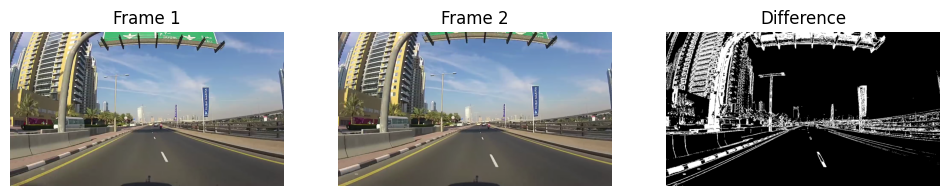

In [10]:
import cv2, numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('road_car_view.mp4')
ret1, f1 = cap.read()
ret2, f2 = cap.read()

if ret1 and ret2:
    diff = cv2.absdiff(f1, f2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(cv2.cvtColor(f1, cv2.COLOR_BGR2RGB)), plt.title('Frame 1'), plt.axis('off')
    plt.subplot(132), plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)), plt.title('Frame 2'), plt.axis('off')
    plt.subplot(133), plt.imshow(thresh, cmap='gray'), plt.title('Difference'), plt.axis('off')
    plt.show()

cap.release()

> How does threshold affect sensitivity?

## 4. Background Subtraction

In [13]:
cv2.createBackgroundSubtractorMOG2?

Docstring:
createBackgroundSubtractorMOG2([, history[, varThreshold[, detectShadows]]]) -> retval
.   @brief Creates MOG2 Background Subtractor
.   
.   @param history Length of the history.
.   @param varThreshold Threshold on the squared Mahalanobis distance between the pixel and the model
.   to decide whether a pixel is well described by the background model. This parameter does not
.   affect the background update.
.   @param detectShadows If true, the algorithm will detect shadows and mark them. It decreases the
.   speed a bit, so if you do not need this feature, set the parameter to false.
Type:      builtin_function_or_method

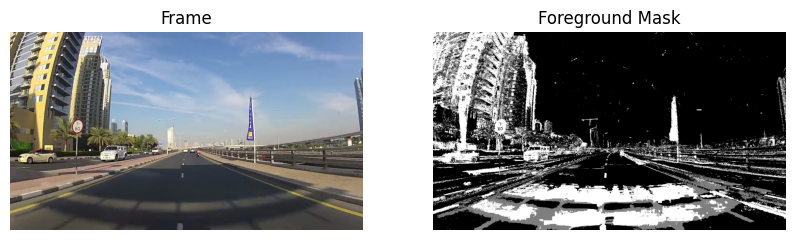

In [11]:
# Detect motion by subtracting a dynamic background model.

cap = cv2.VideoCapture('road_car_view.mp4')
backSub = cv2.createBackgroundSubtractorMOG2(history=100)

for _ in range(30):
    ret, frame = cap.read()
    if not ret: break
    fgMask = backSub.apply(frame)

plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), plt.title('Frame'), plt.axis('off')
plt.subplot(122), plt.imshow(fgMask, cmap='gray'), plt.title('Foreground Mask'), plt.axis('off')
plt.show()

cap.release()

## 5. Sparse Optical Flow (Lucas-Kanade)

Tracks key points between frames to estimate motion direction and speed.

In [15]:
cv2.calcOpticalFlowPyrLK?

Docstring:
calcOpticalFlowPyrLK(prevImg, nextImg, prevPts, nextPts[, status[, err[, winSize[, maxLevel[, criteria[, flags[, minEigThreshold]]]]]]]) -> nextPts, status, err
.   @brief Calculates an optical flow for a sparse feature set using the iterative Lucas-Kanade method with
.   pyramids.
.   
.   @param prevImg first 8-bit input image or pyramid constructed by buildOpticalFlowPyramid.
.   @param nextImg second input image or pyramid of the same size and the same type as prevImg.
.   @param prevPts vector of 2D points for which the flow needs to be found; point coordinates must be
.   single-precision floating-point numbers.
.   @param nextPts output vector of 2D points (with single-precision floating-point coordinates)
.   containing the calculated new positions of input features in the second image; when
.   OPTFLOW_USE_INITIAL_FLOW flag is passed, the vector must have the same size as in the input.
.   @param status output status vector (of unsigned chars); each element of the v

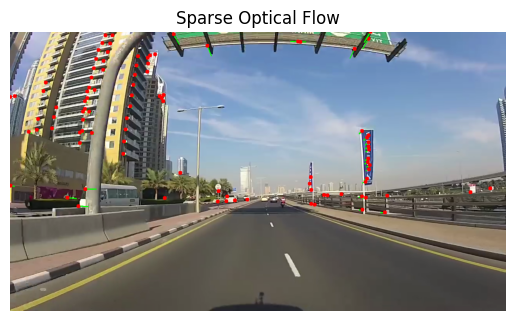

In [14]:
cap = cv2.VideoCapture('road_car_view.mp4')
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15,15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

ret, frame = cap.read()
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

good_new = p1[st==1]
good_old = p0[st==1]
for (new, old) in zip(good_new, good_old):
    a,b = new.ravel()
    c,d = old.ravel()
    frame = cv2.line(frame, (int(a),int(b)), (int(c),int(d)), (0,255,0), 2)
    frame = cv2.circle(frame, (int(a),int(b)), 5, (0,0,255), -1)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Sparse Optical Flow")
plt.axis("off")
plt.show()

cap.release()

Change `maxCorners`, `qualityLevel`, `winSize`.  


## 6. Dense Optical Flow (Farneback)

Estimates motion vector at every pixel for full-scene motion visualization.

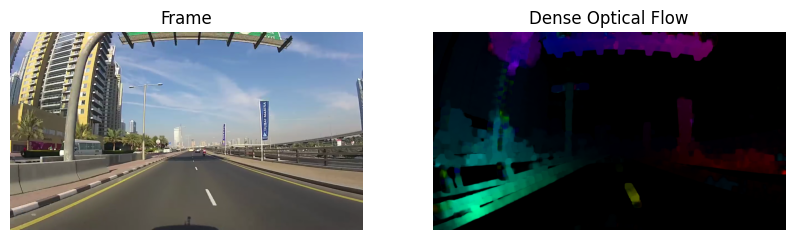

In [16]:
cap = cv2.VideoCapture('road_car_view.mp4')
ret, f1 = cap.read()
ret, f2 = cap.read()
gray1 = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(f2, cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

hsv = np.zeros_like(f1)
hsv[..., 1] = 255
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)), plt.title("Frame"), plt.axis("off")
plt.subplot(122), plt.imshow(rgb), plt.title("Dense Optical Flow"), plt.axis("off")
plt.show()

cap.release()

`pyr_scale`, `winSize`, or `iterations`.  


## 7. Technique Comparison

| Technique             | Pros                          | Cons                            | Best For                     |
|-----------------------|-------------------------------|----------------------------------|------------------------------|
| Frame Differencing     | Fast, simple                  | No direction, noisy             | Fast, binary detection       |
| Background Subtraction | Adapts over time              | Sensitive to sudden changes     | Surveillance, static cameras |
| Sparse Optical Flow    | Tracks direction + velocity   | Sparse, may lose features       | Gesture tracking, robotics   |
| Dense Optical Flow     | Full motion map               | Slow, resource-intensive        | Motion analysis, HCI         |

## 8. Troubleshooting Motion Detection

| Problem | Solution |
|--------|----------|
| Noise triggers motion | Use `cv2.GaussianBlur(gray, (5,5), 0)` |
| Lighting changes | Apply histogram equalization |
| Camera motion confuses detection | Use optical flow + global motion compensation |
| Sparse flow loses points | Increase `maxCorners`, adjust `qualityLevel` |
| Dense flow is chaotic | Reduce frame size, tune `pyr_scale`, `iterations` |